In [45]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [46]:
# Puerta de Grover
def Grover (qubits):
    g = QuantumCircuit(qubits, qubits)

    g.h(range(qubits))
    g.x(range(qubits))

    g.h(qubits - 1)
    g.mct(list(range(qubits - 1)), qubits - 1, 0)
    g.h(qubits - 1)

    g.x(range(qubits))
    g.h(range(qubits))

    return g

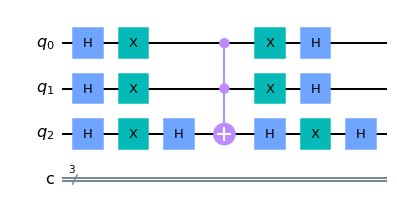

In [47]:
# Caso de una puerta de Grover para 4 Qubits
Grover(3).draw()

In [48]:
def grover_algorithm (detector, qubits):
    circ = QuantumCircuit(qubits,qubits)
    circ.h(range(qubits))
    circ.barrier(range(qubits))
    circ = circ + detector
    circ.barrier(range(qubits))
    circ = circ + Grover(qubits)
    circ.measure(range(qubits), range(qubits))
    return circ

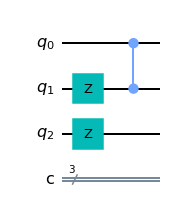

In [49]:
# Este detector pone en fase pi (invierte el signo) de los Qubits
# que formen un número cuyo número de letras sea impar
Detector = QuantumCircuit(3,3)

Detector.z(1)
Detector.z(2)

Detector.cz(1, 0)

Detector.draw()

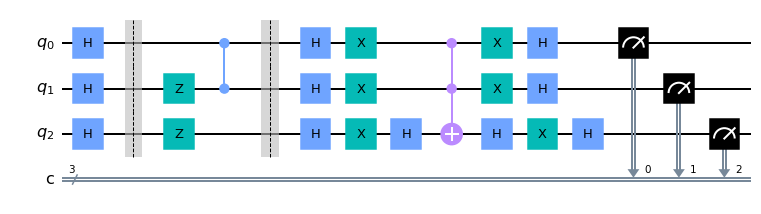

In [50]:
circ = grover_algorithm(Detector, 3)
circ.draw()

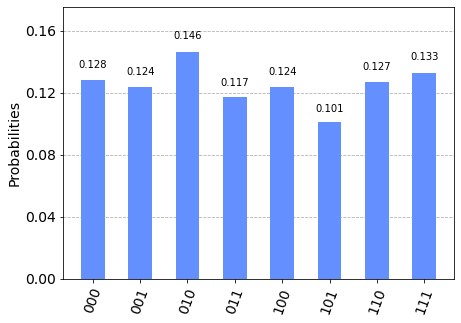

In [51]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 1000)
result = job.result()
count = result.get_counts(circ)
plot_histogram(count)